In [107]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [30, 30]
plt.rcParams['figure.figsize'] = [15, 7]
# plt.rcParams['figure.figsize'] = [12, 12]
import os
from glob import glob

In [21]:
# 54 measures


['35', '663986']

In [28]:
measures = sorted(glob('cancellation_accs/*.npy'), key=lambda f: int(os.path.splitext(os.path.basename(f))[0].split('-')[0]))

In [43]:
n = 43520

In [121]:
measures_n = len(measures)

mm = np.zeros(measures_n)
rates = np.zeros(measures_n)

mean_1 = np.zeros((measures_n, n))
mean_2 = np.zeros((measures_n, n))
mean_3 = np.zeros((measures_n, n))
mean_5 = np.zeros((measures_n, n))
mean_10 = np.zeros((measures_n, n))
mean_15 = np.zeros((measures_n, n))
mean_30 = np.zeros((measures_n, n))
mean_50 = np.zeros((measures_n, n))


fft_1  = np.zeros((measures_n, n // 2 + 1))
fft_2  = np.zeros((measures_n, n // 2 + 1))
fft_3  = np.zeros((measures_n, n // 2 + 1))
fft_5  = np.zeros((measures_n, n // 2 + 1))
fft_10 = np.zeros((measures_n, n // 2 + 1))
fft_15 = np.zeros((measures_n, n // 2 + 1))
fft_30 = np.zeros((measures_n, n // 2 + 1))
fft_50 = np.zeros((measures_n, n // 2 + 1))

In [122]:
for i, measure in enumerate(measures):
    mm[i]     = int(os.path.splitext(os.path.basename(measure))[0].split('-')[0])
    rates[i]  = int(os.path.splitext(os.path.basename(measure))[0].split('-')[1])
    matrix = np.load(measure)
    
    mean_1[i]  = matrix[0]
    mean_2[i]  = np.mean(matrix[:  2], axis=0)
    mean_3[i]  = np.mean(matrix[:  3], axis=0)
    mean_5[i]  = np.mean(matrix[:  5], axis=0)
    mean_10[i] = np.mean(matrix[: 10], axis=0)
    mean_15[i] = np.mean(matrix[: 15], axis=0)
    mean_30[i] = np.mean(matrix[: 30], axis=0)
    mean_50[i] = np.mean(matrix[: 50], axis=0)
    
    fft_1[i]  = 20 * np.log10(np.abs(np.fft.rfft(mean_1[i])) / n)
    fft_2[i]  = 20 * np.log10(np.abs(np.fft.rfft(mean_2[i])) / n)
    fft_3[i]  = 20 * np.log10(np.abs(np.fft.rfft(mean_3[i])) / n)
    fft_5[i]  = 20 * np.log10(np.abs(np.fft.rfft(mean_5[i])) / n)
    fft_10[i] = 20 * np.log10(np.abs(np.fft.rfft(mean_10[i])) / n)
    fft_15[i] = 20 * np.log10(np.abs(np.fft.rfft(mean_15[i])) / n)
    fft_30[i] = 20 * np.log10(np.abs(np.fft.rfft(mean_30[i])) / n)
    fft_50[i] = 20 * np.log10(np.abs(np.fft.rfft(mean_50[i])) / n)
    
    
    
print(mm)
print(rates)
rate_mean = rates.mean()

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.
  90.  95. 100. 120. 140. 160. 180. 200. 250. 300. 350. 400.]
[662154. 662460. 664139. 664468. 663973. 664606. 663912. 664347. 664390.
 663016. 664134. 663915. 663866. 664291. 664301. 664062. 664025. 663923.
 663954. 664462. 663997. 664356. 664155. 664080. 663892. 663993. 664000.
 664637. 663919. 663959. 663994. 663986. 664104. 663946. 664072. 664068.
 664058. 663962. 664241. 663872. 662711. 663925. 663942. 664064. 664059.
 663956. 664090. 664213. 664048. 663833. 664711. 662667. 664022. 663827.]


In [72]:
# rate_mean
f = np.fft.rfftfreq(n, d = 1. / rate_mean)

In [123]:
DICT = {
     1:  fft_1,  
     2:  fft_2,  
     3:  fft_3,  
     5:  fft_5,  
    10: fft_10, 
    15: fft_15, 
    30: fft_30, 
    50: fft_50, 
}

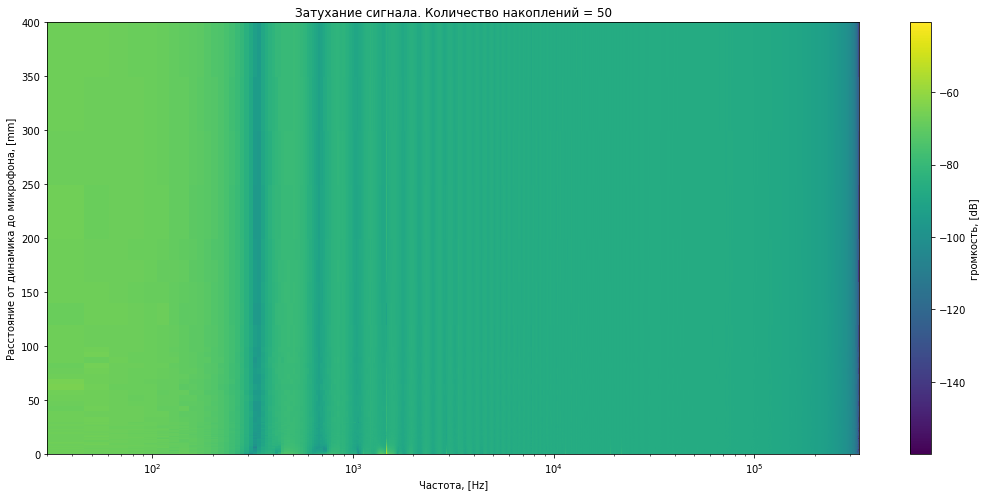

In [131]:
curr = 50

F, MM = np.meshgrid(f, mm)
plt.title(f'Затухание сигнала. Количество накоплений = {curr}')
plt.xlabel('Частота, [Hz]')
plt.ylabel('Расстояние от динамика до микрофона, [mm]')
plt.xlim(30, rate_mean/2) 
plt.semilogx()
# plt.semilogy()
plt.pcolormesh(F, MM, DICT[curr])
plt.tight_layout()
plt.colorbar(label='громкость, [dB]')
plt.savefig(f'{curr}-накопл.png')

<Figure size 2160x2160 with 0 Axes>